In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

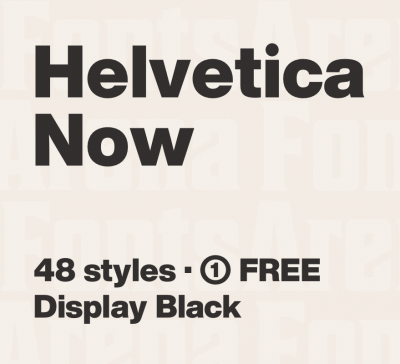

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

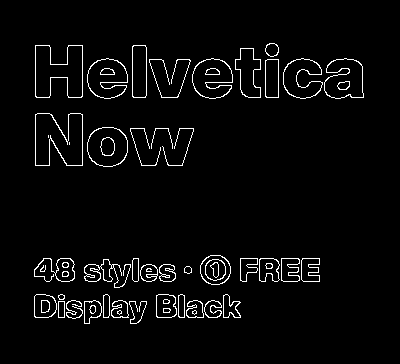

In [5]:
cv2_imshow(edges)

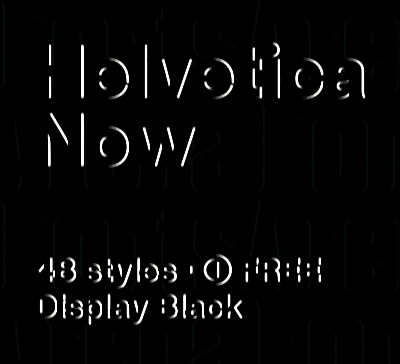

In [6]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

Everything above this block was already written and defind. Let's start the week 1 assignment.

# Assignment To-Do :

**Assignment 1A**

Visit the colab link. Notice the last block. That's a vertical edge detector. The assignment is to find and show (in separate code blocks):

- Horizontal Edge Detector

- 45 Degree Angle Detector (either)

- Blur Kernel

- Sharpen Kernel

- Identity function (doesn't do anything)

**Instructions:**

1. Stick to 3x3 kernels only

2. Do this on Colab, but once done upload to your GitHub Project 1.

3. 50 Marks for Correct Code and 50 marks for great documentation


**Assignment 1B:**

- On your GitHub, add Project 1, and add a readme file (called Assignment 1B). In this readme file, answer the following question:

 1. What are Channels and Kernels (according to EVA)?

 2. Why should we only (well mostly) use 3x3 Kernels?

 3. How many times do we need to perform 3x3 convolution operation to reach 1x1 from 199x199 (show calculations)

- 50 Marks for your explanation and 50 Marks for your creativity

- Keep your project Private,  and add "theschoolofai" or "admin@theschoolofai.in" as a collaborator
Upload GitHub Project 1 link to LMS (make sure you have added theschoolofai as a collaborator)

- Deadline 1 hour before your next session.

- You MUST use your own words while writing any of the above, if we find plagiarism, 0 marks would be awarded for that article.


## Assignment 1A :

Performing convolution on any image is simply running over NxN kernel over the image and doing the multiplication and addtions.

Consider  the following image: we run a 3x3 kernel over a 5x5 image. 

<img src="https://www.codingame.com/servlet/fileservlet?id=23779693390196">

In order to build the edge detectors, we simply need to modify the kernel values. But the question is, what new values needed to be updated ?

One possible solution is to find out which type of edge do you want to detect and then finally feed the kernel with high and low values in only those edge segments such as it amplifies only the particular edge intensity values and deamplifies/reduces other values.

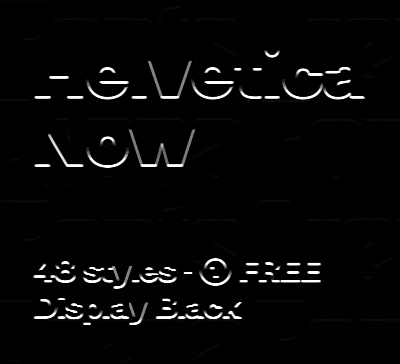

In [7]:
"""
Horizontal edge detector : 

In order to design the horizontal edge detector, we need to transpose the vertical edge detector. We do so because we want only the horizontal edge to amplify.
so,

[
-1 0 1
-1 0 1
-1 0 1
]

would become 

[
-1 -1 -1
 0  0  0
 1  1  1
]

"""

kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)


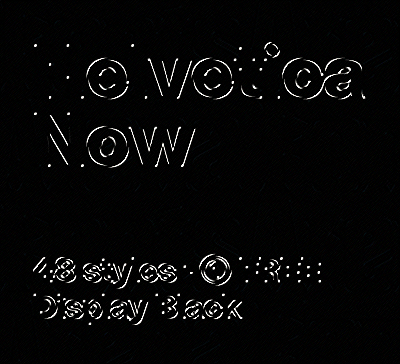

In [8]:
"""
45 degree edge detector : 

In order to design the 45 degree edge detector, we need to amplify the diagonal values and deamplify the other values.
so, something like

[
-2 -2  4
-2  4 -2
 4 -2 -2
]

would produce 45 degrees to left.
"""

kernel = np.float32([[-2,-2,4],[-2,4,-2],[4,-2,-2]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)


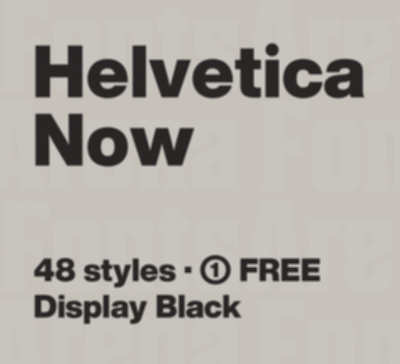

In [9]:
"""
Blur kernel : 

In order to design a blur kernel, we need to divide the pixels of the image. So we use a kernel that divides each value by some factor as it convolves over the image.
So it will simply reduce the pixel values.

[
1/11  1/11  1/11
1/11  1/11  1/11
1/11  1/11  1/11
]

Blur effect is also sometimes called as averaging neighbours.

"""

kernel = np.float32([[1/11,1/11,1/11],[1/11,1/11,1/11],[1/11,1/11,1/11]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)


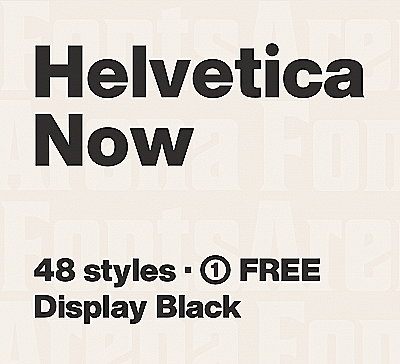

In [17]:
"""
Sharpening kernel : 

In order to design a Sharpening kernel, we need to highlight the pixels of the image. So we use a kernel that emphasis differences in adjacent pixels as it convolves 
over the image. So it will simply amplify the middle pixel and deamplify the neighbouring pixel values.

[
 0 -1  0
-1  5 -1
 0 -1  0
]


"""

kernel = np.float32([[0,-1,0],[-1,5,-1],[0,-1,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)


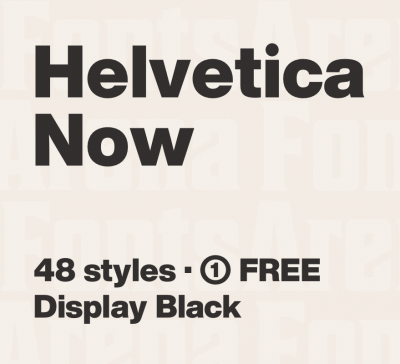

In [13]:
"""
Identity kernel : 

In order to design a Identity kernel, we do not need to do anything. As learnt in senior school, identity matrix is a matrix in which the principle axis have all
ones and rest other values are zeros. The effect of multiplying (in our case, convolution over image by kernel. So Image is the original matrix and kernel is the
identity matrix) any matrix to identity matrix leaves the original matrix unchanged.
In our case, we need to only fille the middleth element as one because its neighbors need not amplify. So in case we do diagonal as ones, then it produces all the 
angled lines in the images more amplified.

[
 0  0  0
 0  1  0
 0  0  0
]


"""

kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)
